# Walmart dataset exploration

**About walmart:**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**Business problem:**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("walmart_data.csv")

NameError: name 'pd' is not defined

# Basic data exploration

In [ ]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Inference:

1. there are in total ten columns, with no null values.

2. There are in total five each string and integer datatype columns.

Finding unique values of each column in the dataframe

In [ ]:
for columns in df.columns:
  unique_count = df[columns].nunique()
  print(columns, "-", unique_count)

User_ID - 5891
Product_ID - 3631
Gender - 2
Age - 7
Occupation - 21
City_Category - 3
Stay_In_Current_City_Years - 5
Marital_Status - 2
Product_Category - 20
Purchase - 18105


Checking if there are any possible null values in the dataframe

In [ ]:
df.isna().isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Shape of the dataframe

In [ ]:
df.shape

(550068, 10)

Summary of the dataframe describing statistical information of categorical variables

In [ ]:
summary = df.describe()
summary

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Finiding if there are any outliers through use of boxplots

Text(0.5, 1.0, 'Boxplot of variable "Purchase"')

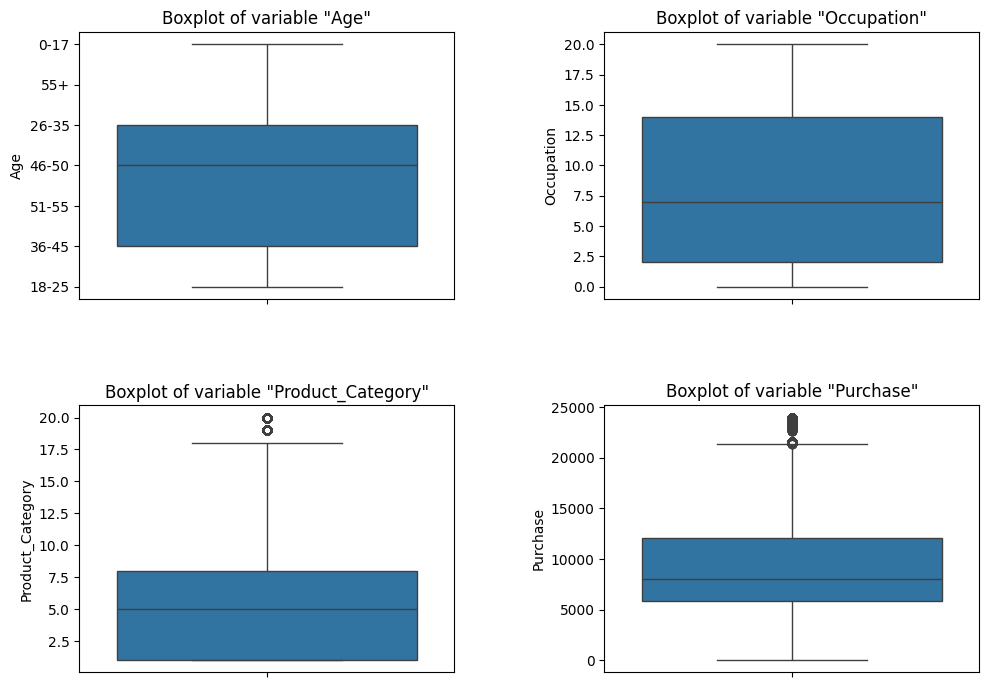

In [ ]:
plt.figure(figsize =(18,8))
plt.subplots_adjust(left=0.4, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

plt.subplot(2,2,1)
sns.boxplot(data = df.Age)
plt.title('Boxplot of variable "Age"')

plt.subplot(2,2,2)
sns.boxplot(data = df.Occupation)
plt.title('Boxplot of variable "Occupation"')

plt.subplot(2,2,3)
sns.boxplot(data = df.Product_Category)
plt.title('Boxplot of variable "Product_Category"')

plt.subplot(2,2,4)
sns.boxplot(data = df.Purchase)
plt.title('Boxplot of variable "Purchase"')



Finding total number of outliers in each categorical varible by setting boundaries

In [ ]:
Q1 = summary[['Product_Category', 'Purchase']].loc["25%"]
Q3 = summary[['Product_Category', 'Purchase']].loc["75%"]
IQR = Q3 - Q1
print(IQR)

Product_Category       7.0
Purchase            6231.0
dtype: float64


In [ ]:
Lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 + 1.5*IQR

bounds_df = pd.DataFrame({"LowerBound" :Lower_bound, "UpperBound" :Upper_bound})
print(bounds_df)

                  LowerBound  UpperBound
Product_Category        -9.5        18.5
Purchase             -3523.5     21400.5


In [ ]:
outliers_lower = (summary[['Product_Category', 'Purchase']] < Lower_bound).sum()
outliers_upper = (summary[['Product_Category', 'Purchase']] > Upper_bound).sum()
total_outliers = outliers_lower  + outliers_upper

ouliers_count_df = pd.DataFrame({"LowerBound_outliers" :outliers_lower, "UpperBound_outliers" :outliers_upper, "Total" : total_outliers})
print(ouliers_count_df)

                  LowerBound_outliers  UpperBound_outliers  Total
Product_Category                    0                    2      2
Purchase                            0                    2      2


In [ ]:
outlier_columns = ['Product_Category', 'Purchase']

for column in outlier_columns:
  threshold = df[column].quantile(0.95)
  df.loc[df[column] > threshold, column] = threshold

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.242486,9217.804488
std,1.727592e+03,6.522660,0.491770,3.508509,4918.694304
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,13.000000,19336.000000


After imputing 95% data values in Product_category and purchases columns to ensure that the effect of outliers is reduced.

Finding Difference between mean and median

In [ ]:
difference_between_Mean_and_Median = (summary[['Product_Category', 'Purchase']].loc["mean"] - summary[['Product_Category', 'Purchase']].loc["50%"])
difference_between_Mean_and_Median

Product_Category       0.404270
Purchase            1216.968713
dtype: float64

<<------------------------------------------------------------------------------------------------>>
<<------------------------------------------------------------------------------------------------>>

<<------------------------------------------------------------------------------------------------>>
<<------------------------------------------------------------------------------------------------>>

1. Count of Products categories grouped under different age bins

In [ ]:
count_of_products_under_agegroup = df.groupby(["Age", "Product_Category"]).size()
count_of_products_under_agegroup = count_of_products_under_agegroup.sort_values(ascending = False).reset_index(name = "Count")
count_of_products_under_agegroup

,Age,Product_Category,Count
0,26-35,5,61473
1,26-35,1,58249
2,26-35,8,44256
3,36-45,5,29377
4,18-25,5,28522
...,...,...,...
86,0-17,7,53
87,46-50,9,33
88,51-55,9,29
89,0-17,9,16


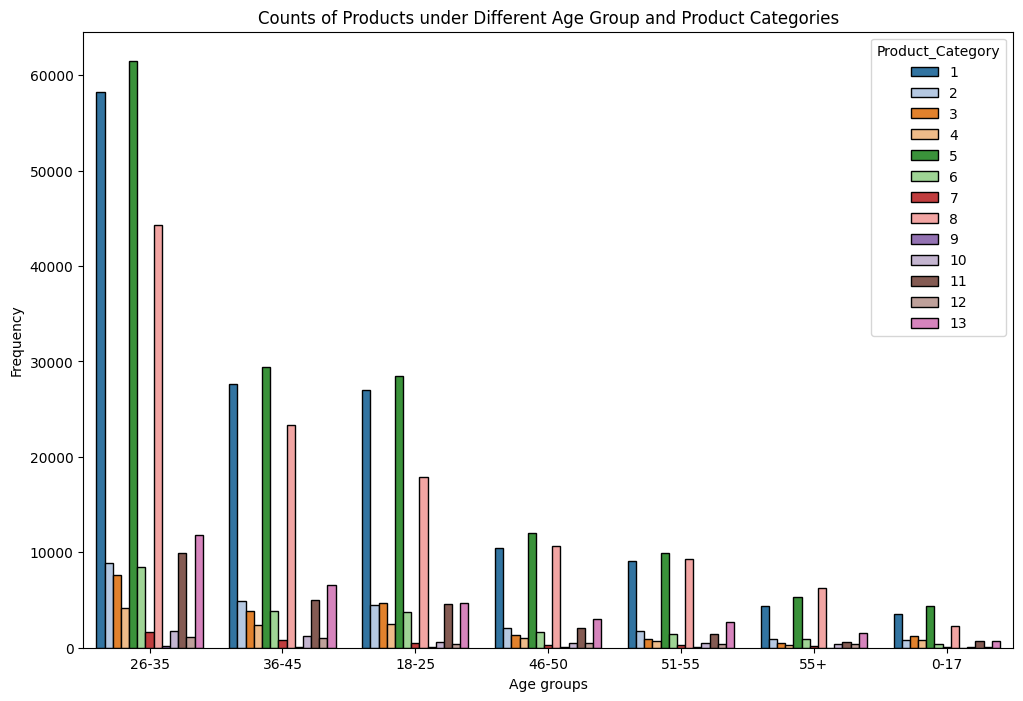

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(data = count_of_products_under_agegroup, x = "Age", y = "Count",
             hue = "Product_Category", palette = 'tab20', edgecolor='black')
plt.title("Counts of Products under Different Age Group and Product Categories")
plt.xlabel('Age groups')
plt.ylabel('Frequency')
plt.show()


**Inference:** In almost every age bin, category 5 tops the place in terms of purchase count. Along with category 5, we have category 1 and 8 with significant contributions in almost every age bin category.

**Recommendation:** For every age bin, it is highly suggested to target on product categories (1,5,8) combinedly to increase the demand further and improve the business performance.

<<------------------------------------------------------------------------------------------------>>
<<------------------------------------------------------------------------------------------------>>

2. Relationship between age, marital status and amount spent

In [ ]:
Total_Purchase_amount = df.groupby(["Age", "Marital_Status"])["Purchase"].sum()
Total_Purchase_amount = Total_Purchase_amount.sort_index(ascending = True).reset_index()
Total_Purchase_amount

,Age,Marital_Status,Purchase
0,0-17,0,134278496
1,18-25,0,720943705
2,18-25,1,189097355
3,26-35,0,1227398110
4,26-35,1,794737279
5,36-45,0,620936056
6,36-45,1,400291030
7,46-50,0,113017885
8,46-50,1,305637092
9,51-55,0,103001031


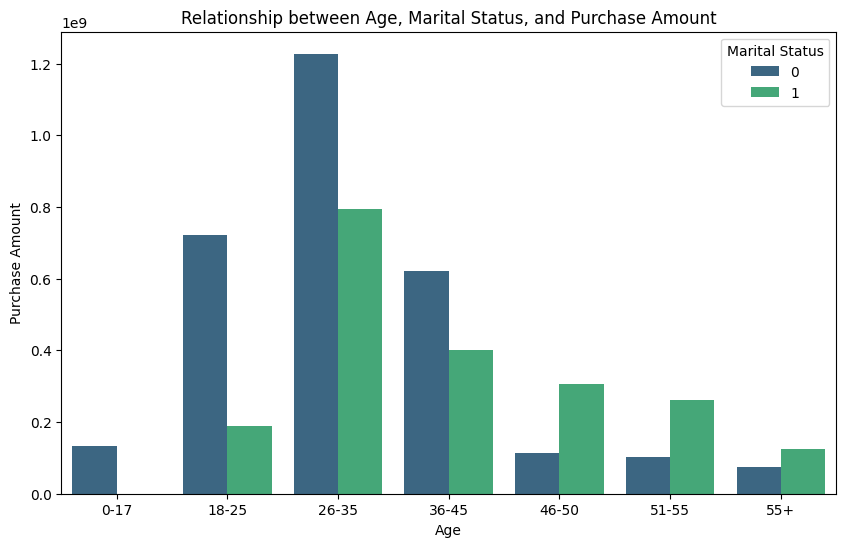

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Total_Purchase_amount, x='Age', y='Purchase', hue='Marital_Status', palette='viridis')
plt.title('Relationship between Age, Marital Status, and Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.legend(title='Marital Status')
plt.show()

**Inference:** From this above graph we can infer that Non married people dominate the purchases below the age bin 45, and married couple does more purchases above the age bin 45.

Also from overall point of view, people between 18-45 age group does more purchases than rest of others. In particular people in the age group of 26-35 are actively purchasing more than any other age groups amounting to 39.87% of total purchases.

**Recommednation:** Focusing on 26-35 age groups yields better results for maintaining purchases demand and also majority of purchases are from people below 45 specifically belonging to non-married; Thus, targetting with some specific type of products or employing certain preferences which cater to them will increase the overall business turnover.

<<------------------------------------------------------------------------------------------------>>
<<------------------------------------------------------------------------------------------------>>

3. Preferred product categories grouped based on gender

In [ ]:
count_of_products_under_gender = df.groupby(["Gender", "Product_Category"]).size()
count_of_products_under_gender = count_of_products_under_gender.reset_index(name = 'Count').sort_values(by = ["Gender", "Product_Category"], ascending = [False, True])
count_of_products_under_gender

,Gender,Product_Category,Count
13,M,1,115547
14,M,2,18206
15,M,3,14207
16,M,4,8114
17,M,5,108972
18,M,6,15907
19,M,7,2778
20,M,8,80367
21,M,9,340
22,M,10,3963


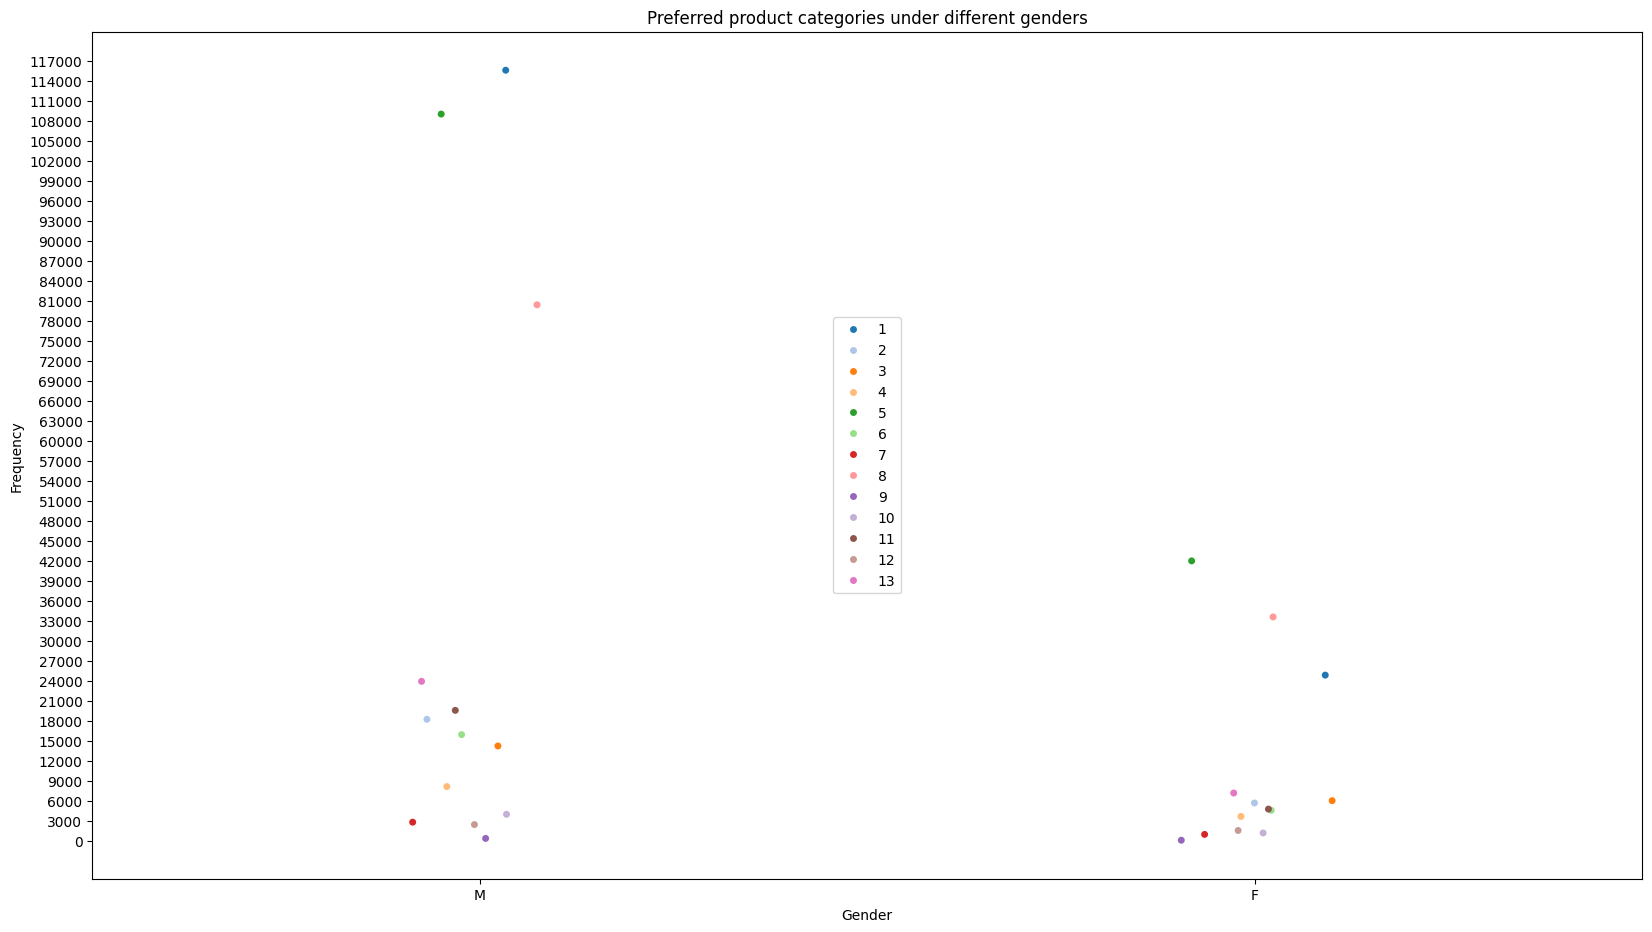

In [ ]:

plt.figure(figsize = (20, 11))
sns.stripplot(data = count_of_products_under_gender, x = "Gender", y = "Count",
              hue = "Product_Category", palette = 'tab20', edgecolor='black')
plt.title("Preferred product categories under different genders")
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.yticks(range(0,120000,3000), fontsize = 10)
plt.legend(loc = 'center')
plt.show()

**Inference:** Based on the above graph we can infer that males(75.31% of Total products) domiante the purchases than females. In particular there are three specific categories(1,5,8) stood apart in both males(73.59% of Total Male products) and females(73.89% of Total Female products) purchasing history. Especially for males, both categories 1 and 5 crossed the mark of 100000 in total, whereas in females the highest sales stood below 42000 mark.

Rest of product category purchases in both males and females were below the mark of 21000, and majority of them were below 9000.

**Recommendation:** To increase overall sales, the company should focus more on males specifically from (1,5,8) categories. If there are proper strategies being installed in place to increase the demand of sales from males, then focus should also shift to females for the same categories.

It was best to decrease unwarranted expenditure on cluster of product categories below the sales of 9000.

<<------------------------------------------------------------------------------------------------>>
<<------------------------------------------------------------------------------------------------>>

4. Relationship between Purchase amount, Gender, City_Category and Product Category

In [ ]:
Amount_under_city_and_product = df.groupby(["Gender", "City_Category", "Product_Category"])["Purchase"].sum()
Amount_under_city_and_product = Amount_under_city_and_product.reset_index().sort_values(by=["Gender", "City_Category", "Product_Category"], ascending=[False, True, True])
Amount_under_city_and_product

,Gender,City_Category,Product_Category,Purchase
39,M,A,1,375724153
40,M,A,2,50930747
41,M,A,3,35592296
42,M,A,4,4893956
43,M,A,5,186780661
...,...,...,...,...
34,F,C,9,320187
35,F,C,10,7226216
36,F,C,11,6924018
37,F,C,12,766380


Text(875.1887119622882, 0.5, 'Purchase Amount')

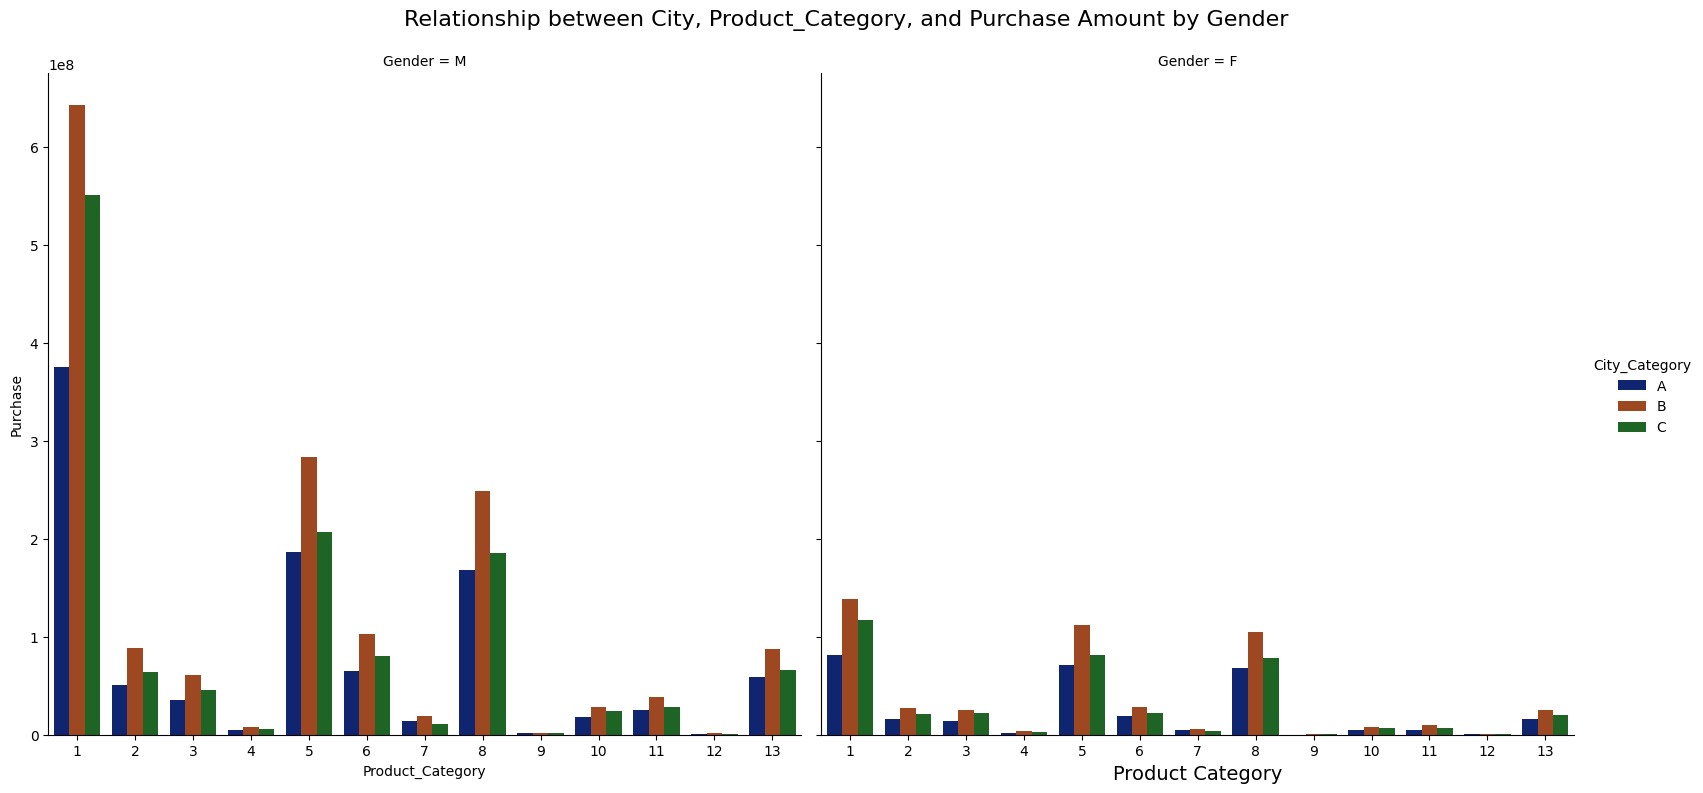

In [ ]:
g = sns.catplot(data=Amount_under_city_and_product, kind="bar", x="Product_Category", y="Purchase",
                hue="City_Category", col="Gender", palette="dark", height=8, aspect=1)

plt.subplots_adjust(top=0.9)
plt.suptitle("Relationship between City, Product_Category, and Purchase Amount by Gender", fontsize=16)
plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Purchase Amount", fontsize=14)

**Inference:** (Male) From the above graph we can infer that category B purchases(41.48% of total male purchase amount) stood top for almost every product category. And if we consider product categories in specific then (1,5,8) combined amounts to 57.67% of total male purchases.

(Female) from the above graph we can infer that again category B purchases(41.61% of Total female purchases) stood top fro almost every product category. And if we consider product categories in specific then (1,5,8) combined amounts to 71.99% of total female purchases.

**Recommendation:** Concentrating on **City_category B** for both male and femlaes and in specific, categories (1,5,8) combinedly will yield high business performance.

<<------------------------------------------------------------------------------------------------>>
<<------------------------------------------------------------------------------------------------>>

5. Relationship between Purchase amount, Gender and Occupation

In [ ]:
Amount_under_gender_occupation_product = df.groupby(["Gender", "Occupation"])["Purchase"].sum()
Amount_under_gender_occupation_product = Amount_under_gender_occupation_product.reset_index().sort_values(by=["Gender", "Occupation"], ascending=[False, True])
Amount_under_gender_occupation_product

,Gender,Occupation,Purchase
21,M,0,473379475
22,M,1,270394178
23,M,2,164433706
24,M,3,89812488
25,M,4,511501375
26,M,5,93697409
27,M,6,113668118
28,M,7,463987090
29,M,8,11326625
30,M,9,4124239


<ipython-input-27-c93cc4ca4da3>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(data=Amount_under_gender_occupation_product, x="Occupation", y="Purchase", hue="Gender", color = "red")


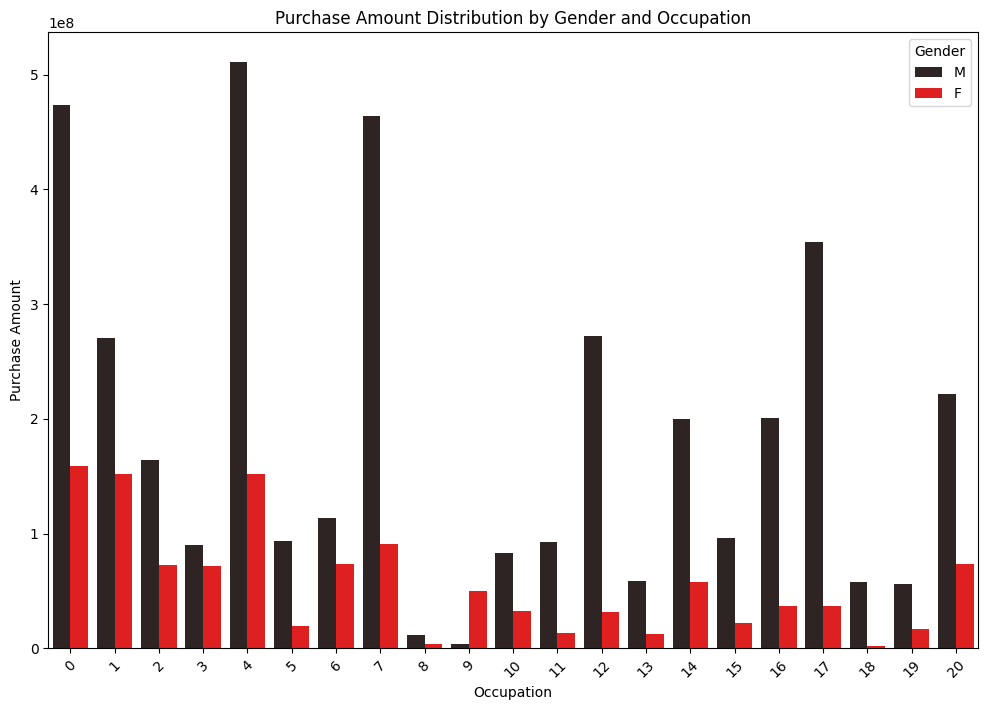

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=Amount_under_gender_occupation_product, x="Occupation", y="Purchase", hue="Gender", color = "red")
plt.title("Purchase Amount Distribution by Gender and Occupation")
plt.xlabel("Occupation")
plt.ylabel("Purchase Amount")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.show()

**Inference:** (Male) From the above graph we can infer that occupations(0,1,4,7,12,14,16,17,20) combined have a Total Purchases of 76.30%

(Female) From the above graph we can infer that occupations(0,1,4,7,9,14,20) combined have a Total Purchases of 62.19%

**Recommednation:** It is observed that from both genders; Occupations like (0,1,4,7,14,20) have equally high percenatege contribution to purchases. Thus targetting these occupations in both genders yields good business returns.

<<------------------------------------------------------------------------------------------------>>
<<------------------------------------------------------------------------------------------------>>

# Calculating confidence Intervals

6. Affect of Gender affecting the purchases made

In [ ]:
male_data = df[df["Gender"] == 'M']['Purchase']
female_data = df[df["Gender"] == 'F']['Purchase']

def bootstrap_CI(data, bootstrap_samples, alpha):
  boot_means = []
  for _ in range(bootstrap_samples):
    sample = np.random.choice(data, size = len(data), replace = True)
    boot_means.append(np.mean(sample))

  lower_bound = np.percentile(boot_means, 100 * alpha/2)
  upper_bound = np.percentile(boot_means, 100 * (1 - alpha / 2))
  return lower_bound, upper_bound

bootstrap_samples= 10000
alpha = 0.05
male_CI = bootstrap_CI(male_data, bootstrap_samples, alpha)
female_CI = bootstrap_CI(female_data, bootstrap_samples, alpha)

print("95% Confidence Interval for Males:", male_CI)
print("95% Confidence Interval for Females:", female_CI)

95% Confidence Interval for Males: (9374.36949263625, 9404.454772074958)
95% Confidence Interval for Females: (8669.137397742417, 8718.33644916758)


**Inference:** (Random samples drawn 10000 from entire data set considered as sample)

1. it can be concluded from the above observation of confidence intervals that there was no wider gap between intervals and infact the difference are very low in both females and males regarding their purcahses. Here, we can conclude that the mean calculated from the random 10000 samples from the entire dataset truly represents the population characteristics of the data.

2. As the sample size was entire dataset, the width of the intervals is quite low, but if the smaple size was been lower, we can observe that the width increases gradually to an extent.

3. There has been no evidence of overlapping of male and female samples of mean purchases; Thus, we can conclude that there was significant difference of purchasing behaviour between males and females.

4. As the sample size increases, the sampling distribution of the sample mean approaches a normal distribution, regardless of the shape of the population distribution, according to the Central Limit Theorem. This means that for sufficiently large sample sizes, the distribution of sample means becomes more symmetric and bell-shaped.

5. With larger samples the variability also decreases, this was because larger samples provide more information about the population, thus gap between the intervals gets reduced.

For smaller smaple sizes

In [ ]:
def bootstrap_CI(data, bootstrap_samples, sample_size, alpha):
    boot_means = []
    for _ in range(bootstrap_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        boot_means.append(np.mean(sample))

    lower_bound = np.percentile(boot_means, 100 * alpha / 2)
    upper_bound = np.percentile(boot_means, 100 * (1 - alpha / 2))
    return lower_bound, upper_bound


sample_sizes = [300, 3000, 30000]
bootstrap_samples= 10000
alpha = 0.05

cis_data = []

# Calculate confidence intervals for each gender and sample size
for gender, gender_data in {'Male': male_data, 'Female': female_data}.items():
    print(f"Confidence Intervals for Gender: {gender}")
    for sample_size in sample_sizes:
        ci = bootstrap_CI(gender_data, bootstrap_samples, sample_size, alpha)
        print(f"Sample Size: {sample_size}, CI: {ci}")
        cis_data.append({
            'Sample Size': sample_size,
            'Gender': gender,
            'Lower Bound': ci[0],
            'Upper Bound': ci[1]
        })

print("<------------------------------------------------------->")
print("<------------------------------------------------------->")
cis_df = pd.DataFrame(cis_data)
print(cis_df)

Confidence Intervals for Gender: Male
Sample Size: 300, CI: (8835.426166666666, 9952.457916666666)
Sample Size: 3000, CI: (9209.9686, 9568.78335)
Sample Size: 30000, CI: (9332.532999166666, 9446.960659999999)
Confidence Intervals for Gender: Female
Sample Size: 300, CI: (8170.728499999999, 9234.30675)
Sample Size: 3000, CI: (8527.628349999999, 8858.382191666666)
Sample Size: 30000, CI: (8640.5189575, 8745.772165)
<------------------------------------------------------->
<------------------------------------------------------->
   Sample Size  Gender  Lower Bound  Upper Bound
0          300    Male  8835.426167  9952.457917
1         3000    Male  9209.968600  9568.783350
2        30000    Male  9332.532999  9446.960660
3          300  Female  8170.728500  9234.306750
4         3000  Female  8527.628350  8858.382192
5        30000  Female  8640.518958  8745.772165


Inference: (Randomly 10000 samples drawn for each sample size of 300,3000, 30000 from the dataset)

1. It can be concluded from the above observation of confidence intervals that the gap between intervals gradually got reduced as sample size increased from 300 to 30000. Infact the difference was very low in both females and males regarding their purcahses in highest sample size. With lower difference, we can conclude that the mean calculated from the random 30000 sample size truly represents the population characteristics of the data.


2. There has been evidence of overlapping of male and female samples of mean purchases when the sample size is 300, however when the size increased the overlapping diminished; Thus, we can conclude that there was significant difference of purchasing behaviour between males and females with a reliable sample size.

3. As the sample size increases, the sampling distribution of the sample mean approaches a normal distribution, regardless of the shape of the population distribution, according to the Central Limit Theorem. This means that for sufficiently large sample sizes, the distribution of sample means becomes more symmetric and bell-shaped.

4. With larger samples the variability also decreases, this was because larger samples provide more information about the population, thus gap between the intervals gets reduced.

Visual represenattion for sample sizes

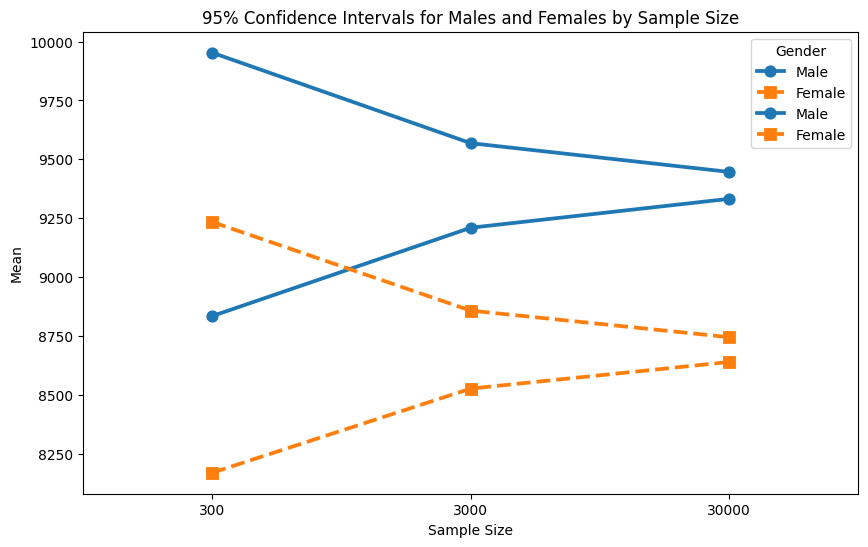

In [ ]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=cis_df, x='Sample Size', y='Lower Bound', hue='Gender', markers=['o', 's'], linestyles=['-', '--'])
sns.pointplot(data=cis_df, x='Sample Size', y='Upper Bound', hue='Gender', markers=['o', 's'], linestyles=['-', '--'])
plt.title('95% Confidence Intervals for Males and Females by Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Mean')
plt.legend(title='Gender')
plt.show()

<<------------------------------------------------------------------------------------------------>>
<<------------------------------------------------------------------------------------------------>>

7. Affect of marital status on Purcahses made

In [ ]:
marital_data = df[df["Marital_Status"] == 1]['Purchase']
Non_marital_data = df[df["Marital_Status"] == 0]['Purchase']

def bootstrap_CI(data, bootstrap_samples, alpha):
  boot_means = []
  for _ in range(bootstrap_samples):
    sample = np.random.choice(data, size = len(data), replace = True)
    boot_means.append(np.mean(sample))

  lower_bound = np.percentile(boot_means, 100 * alpha/2)
  upper_bound = np.percentile(boot_means, 100 * (1 - alpha / 2))
  return lower_bound, upper_bound

bootstrap_samples= 10000
alpha = 0.05
married_CI = bootstrap_CI(marital_data, bootstrap_samples, alpha)
Non_married_CI = bootstrap_CI(Non_marital_data, bootstrap_samples, alpha)

print("95% Confidence Interval for Married:", married_CI)
print("95% Confidence Interval for Non-married:", Non_married_CI)

95% Confidence Interval for Married: (9193.552044271468, 9234.088529291683)
95% Confidence Interval for Non-married: (9203.916272699556, 9237.902054777647)


Inference: (Random samples drawn 10000 from entire data set considered as sample)

1. It can be concluded from the above observation of confidence intervals that there was no wider gap between intervals and infact the difference are very very low in both married and non-married regarding their purcahses. Here, we can conclude that the mean calculated from the random 10000 samples from the entire dataset truly represents the population characteristics of the data.

2. As the sample size was entire dataset, the width of the intervals is quite very low, but if the smaple size was been lower, we can observe that the width increases gradually to an extent.

3. There has been evidence of overlapping of married and non-married samples of mean purchases; Thus, we can conclude that there was no significant difference of purchasing behaviour between the two groups.

4. As the sample size increases, the sampling distribution of the sample mean approaches a normal distribution, regardless of the shape of the population distribution, according to the Central Limit Theorem. This means that for sufficiently large sample sizes, the distribution of sample means becomes more symmetric and bell-shaped.

5. With larger samples the variability also decreases, this was because larger samples provide more information about the population, thus gap between the intervals gets reduced.

For smaller sample sizes

In [ ]:
def bootstrap_CI(data, bootstrap_samples, sample_size, alpha):
    boot_means = []
    for _ in range(bootstrap_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        boot_means.append(np.mean(sample))

    lower_bound = np.percentile(boot_means, 100 * alpha / 2)
    upper_bound = np.percentile(boot_means, 100 * (1 - alpha / 2))
    return lower_bound, upper_bound


sample_sizes = [300, 3000, 30000]
bootstrap_samples= 10000
alpha = 0.05

cis_data = []

# Calculate confidence intervals for each marital status and sample size
for status, status_data in {'Married': marital_data, 'Non-married': Non_marital_data}.items():
    print(f"Confidence Intervals for Marital Status: {status}")
    for sample_size in sample_sizes:
        ci = bootstrap_CI(status_data, bootstrap_samples, sample_size, alpha)
        print(f"Sample Size: {sample_size}, CI: {ci}")
        cis_data.append({
            'Sample Size': sample_size,
            'Marital Status': status,
            'Lower Bound': ci[0],
            'Upper Bound': ci[1]
        })

print("<------------------------------------------------------->")
print("<------------------------------------------------------->")
cis_df = pd.DataFrame(cis_data)
print(cis_df)

Confidence Intervals for Marital Status: Married
Sample Size: 300, CI: (8661.559833333333, 9780.522)
Sample Size: 3000, CI: (9039.83935, 9386.649991666667)
Sample Size: 30000, CI: (9156.755615833334, 9268.643386666667)
Confidence Intervals for Marital Status: Non-married
Sample Size: 300, CI: (8660.696833333333, 9785.067833333334)
Sample Size: 3000, CI: (9044.380133333332, 9394.3863)
Sample Size: 30000, CI: (9164.962270833334, 9277.7094125)
<------------------------------------------------------->
<------------------------------------------------------->
   Sample Size Marital Status  Lower Bound  Upper Bound
0          300        Married  8661.559833  9780.522000
1         3000        Married  9039.839350  9386.649992
2        30000        Married  9156.755616  9268.643387
3          300    Non-married  8660.696833  9785.067833
4         3000    Non-married  9044.380133  9394.386300
5        30000    Non-married  9164.962271  9277.709413


**Inference: **(Randomly 10000 samples drawn for each sample size of 300,3000, 30000 from the dataset)

1. It can be concluded from the above observation of confidence intervals that there was no significant decrement of gap between intervals as sample size increased from 300 to 30000. Infact the difference were stable between both married and non-married for each sample size. But as sample size got to 30000, the interval was been at 9000 range.

2. There has been evidence of overlapping of married and non-married samples of mean purchases for all sample sizes of 300, 3000 and 30000. Thus, we can conclude that there was no significant difference of purchasing behaviour between the two groups.

3. As the sample size increases, the sampling distribution of the sample mean approaches a normal distribution, regardless of the shape of the population distribution, according to the Central Limit Theorem. This means that for sufficiently large sample sizes, the distribution of sample means becomes more symmetric and bell-shaped.

4. However here even with low sample size we observed very less difference between intervals, does it indicates the strong similarity of purchasing behaviour between married and non married.



Visual represenattion for sample sizes

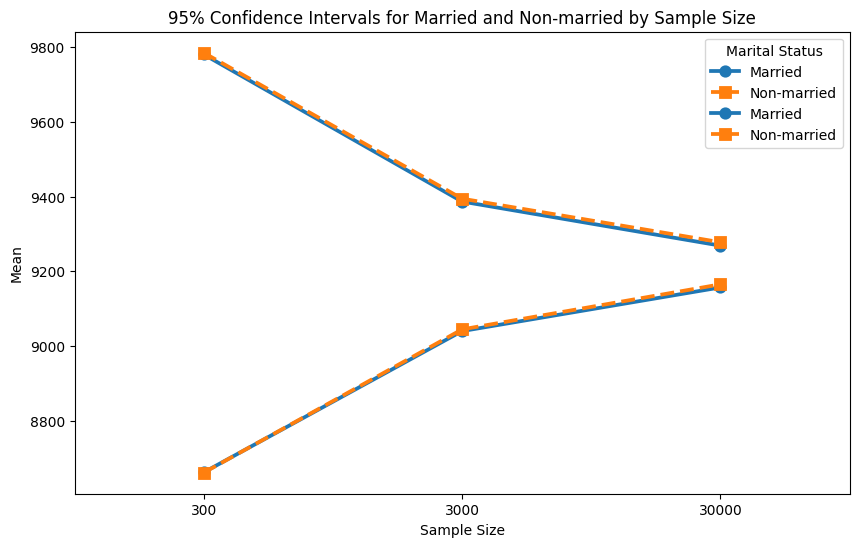

In [ ]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=cis_df, x='Sample Size', y='Lower Bound', hue='Marital Status', markers=['o', 's'], linestyles=['-', '--'])
sns.pointplot(data=cis_df, x='Sample Size', y='Upper Bound', hue='Marital Status', markers=['o', 's'], linestyles=['-', '--'])
plt.title('95% Confidence Intervals for Married and Non-married by Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Mean')
plt.legend(title='Marital Status')
plt.show()


<<------------------------------------------------------------------------------------------------>>
<<------------------------------------------------------------------------------------------------>>

8. Affect of Age on Purchases made

In [ ]:
under_18 = df[df["Age"] == '0-17']["Purchase"]
over_18_to_25 = df[df["Age"] == '18-25']["Purchase"]
over_25_to_35 = df[df["Age"] == '26-35']["Purchase"]
over_35_to_45 = df[df["Age"] == '36-45']["Purchase"]
over_45_to_50 = df[df["Age"] == '46-50']["Purchase"]
over_50_to_55 = df[df["Age"] == '51-55']["Purchase"]
over_55 = df[df["Age"] == '55+']["Purchase"]

def bootstrap_CI(data, bootstrap_samples, alpha):
  boot_means = []
  for _ in range(bootstrap_samples):
    sample = np.random.choice(data, size = len(data), replace = True)
    boot_means.append(np.mean(sample))

  lower_bound = np.percentile(boot_means, 100 * alpha/2)
  upper_bound = np.percentile(boot_means, 100 * (1 - alpha / 2))
  return lower_bound, upper_bound

bootstrap_samples= 10000
alpha = 0.05
under_18_CI = bootstrap_CI(under_18, bootstrap_samples, alpha)
over_18_to_25_CI = bootstrap_CI(over_18_to_25, bootstrap_samples, alpha)
over_25_to_35_CI = bootstrap_CI(over_25_to_35, bootstrap_samples, alpha)
over_35_to_45_CI = bootstrap_CI(over_35_to_45, bootstrap_samples, alpha)
over_45_to_50_CI = bootstrap_CI(over_45_to_50, bootstrap_samples, alpha)
over_50_to_55_CI = bootstrap_CI(over_50_to_55, bootstrap_samples, alpha)
over_55_CI =  bootstrap_CI(over_55, bootstrap_samples, alpha)

print("95% Confidence Interval for under_18:", under_18_CI)
print("95% Confidence Interval for over_18_to_25:", over_18_to_25_CI)
print("95% Confidence Interval for over_25_to_35:", over_25_to_35_CI)
print("95% Confidence Interval for over_35_to_45:", over_35_to_45_CI)
print("95% Confidence Interval for over_45_to_50:", over_45_to_50_CI)
print("95% Confidence Interval for over_50_to_55:", over_50_to_55_CI)
print("95% Confidence Interval for over_55:", over_55_CI)


95% Confidence Interval for under_18: (8813.31731062111, 8971.338127400344)
95% Confidence Interval for over_18_to_25: (9100.691309953843, 9162.240739263496)
95% Confidence Interval for over_25_to_35: (9188.641092596556, 9229.18980028417)
95% Confidence Interval for over_35_to_45: (9253.049399161919, 9311.43042322271)
95% Confidence Interval for over_45_to_50: (9116.58729458874, 9205.634808866327)
95% Confidence Interval for over_50_to_55: (9422.785987376952, 9520.41390808031)
95% Confidence Interval for over_55: (9209.167651367186, 9338.638732328869)


**Inference:** (Random samples drawn 10000 from entire data set considered as sample)

1. It can be concluded from the above observation of confidence intervals that there was no wider gap between intervals and infact the difference are very low in every age bin category regarding their purcahses. Here, we can conclude that the mean calculated from the random 10000 samples from the entire dataset truly represents the population characteristics of the data.

2. As the sample size is entire dataset, the width of the intervals are quite low, but if the smaple size was been lower, we can observe that the width increases gradually to an extent.

3. There has been evidence of overlapping of age bins between (over_18_to_25) with (over_45_to_50) and (over_25_to_35) with both(over_45_to_50) and (over_55) samples of mean purchases; Thus, we can conclude that there was no significant difference of purchasing behaviour between these bins.

4. As the sample size increases, the sampling distribution of the sample mean approaches a normal distribution, regardless of the shape of the population distribution, according to the Central Limit Theorem. This means that for sufficiently large sample sizes, the distribution of sample means becomes more symmetric and bell-shaped.

5. With larger samples the variability also decreases, this was because larger samples provide more information about the population, thus gap between the intervals gets reduced.

For smaller sample sizes

In [ ]:
def bootstrap_CI(data, bootstrap_samples, sample_size, alpha):
    boot_means = []
    for _ in range(bootstrap_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        boot_means.append(np.mean(sample))

    lower_bound = np.percentile(boot_means, 100 * alpha / 2)
    upper_bound = np.percentile(boot_means, 100 * (1 - alpha / 2))
    return lower_bound, upper_bound

sample_sizes = [300, 3000, 30000]
bootstrap_samples= 10000
alpha = 0.05


age_groups_data = {
    'under_18': under_18,
    'over_18_to_25': over_18_to_25,
    'over_25_to_35': over_25_to_35,
    'over_35_to_45': over_35_to_45,
    'over_45_to_50': over_45_to_50,
    'over_50_to_55': over_50_to_55,
    'over_55': over_55
}


cis_data = []

for age_group, age_group_data in age_groups_data.items():
    for sample_size in sample_sizes:
        ci = bootstrap_CI(age_group_data, bootstrap_samples, sample_size, alpha)
        cis_data.append({
                'Sample Size': sample_size,
                'Age Group': age_group,
                'Lower Bound': ci[0],
                'Upper Bound': ci[1]
            })

cis_df = pd.DataFrame(cis_data)
print(cis_df)


    Sample Size      Age Group  Lower Bound   Upper Bound
0           300       under_18  8331.935500   9459.562500
1          3000       under_18  8714.036658   9068.714517
2         30000       under_18  8834.967429   8947.613172
3           300  over_18_to_25  8581.007917   9696.558333
4          3000  over_18_to_25  8956.992208   9308.366075
5         30000  over_18_to_25  9075.507861   9188.217793
6           300  over_25_to_35  8655.133333   9777.028333
7          3000  over_25_to_35  9034.980017   9382.333333
8         30000  over_25_to_35  9153.729880   9264.736203
9           300  over_35_to_45  8736.419917   9851.515833
10         3000  over_35_to_45  9104.238617   9456.881025
11        30000  over_35_to_45  9228.040717   9338.715458
12          300  over_45_to_50  8623.320167   9718.114167
13         3000  over_45_to_50  8982.710492   9337.373058
14        30000  over_45_to_50  9105.793848   9215.685360
15          300  over_50_to_55  8915.240833  10044.546250
16         300

**Inference:** (Randomly 10000 samples drawn for each sample size of 300,3000, 30000 from the dataset)

1. It can be concluded from the above observation of confidence intervals that the gap between intervals gradually got reduced as sample size increased from 300 to 30000. Infact the difference was very low in all age bins regarding their purcahses in highest sample size. With lower difference, we can conclude that the mean calculated from the random 30000 sample size truly represents the population characteristics of the data.


2. There has been evidence of overlapping of certain age bins between over_35_to_45 with over_55 samples of mean purchases at every sample size. Ands Age bins of over_18_to_25, over_25_to_35 and over_45_to_50 interact with under_18, thus the there was less behavioural difference between these age bins.

3. As the sample size increases, the sampling distribution of the sample mean approaches a normal distribution, regardless of the shape of the population distribution, according to the Central Limit Theorem. This means that for sufficiently large sample sizes, the distribution of sample means becomes more symmetric and bell-shaped.

4. With larger samples the variability also decreases, this was because larger samples provide more information about the population, thus gap between the intervals gets reduced.


Visual represenattion for sample sizes

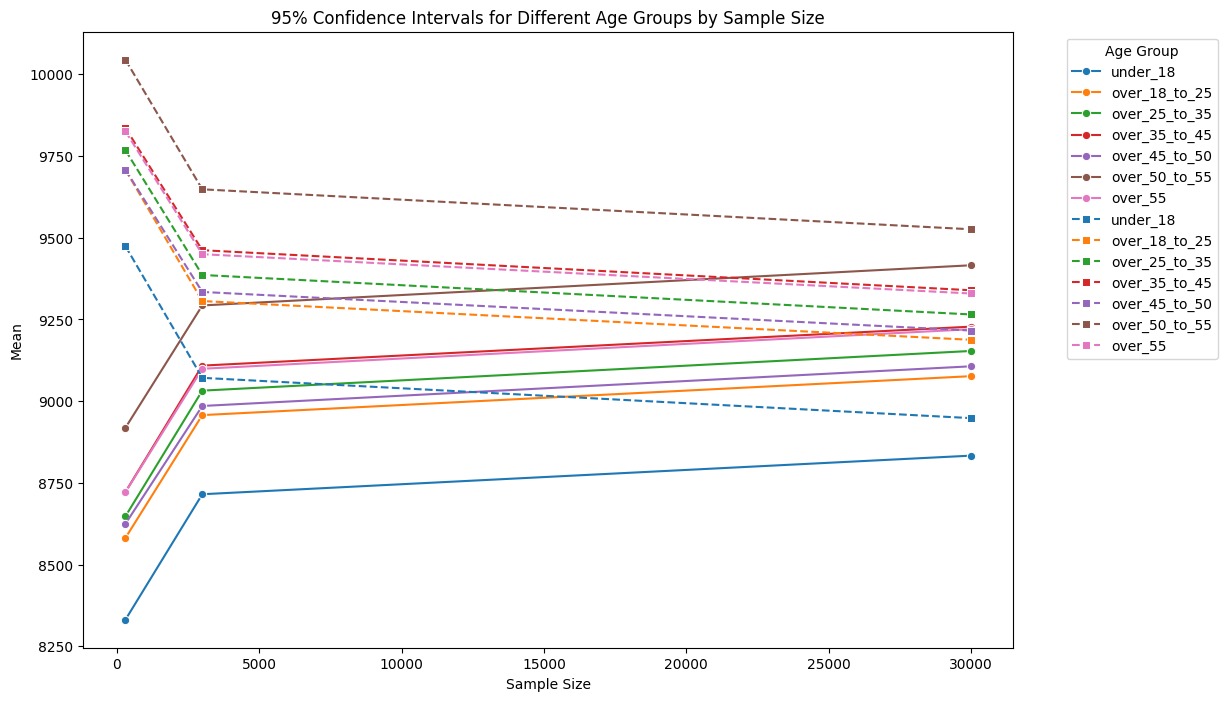

In [ ]:

plt.figure(figsize=(12, 8))
sns.lineplot(data=cis_df, x='Sample Size', y='Lower Bound', hue='Age Group', marker='o', linestyle='-')
sns.lineplot(data=cis_df, x='Sample Size', y='Upper Bound', hue='Age Group', marker='s', linestyle='--')
plt.title('95% Confidence Intervals for Different Age Groups by Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Mean')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Conducting statistical tests to check the relationships between dependent and independent variables

In [ ]:
from statsmodels.stats import weightstats as stests

male_purchases = df[df['Gender'] == 'M']['Purchase']
female_purchases = df[df['Gender'] == 'F']['Purchase']

alpha = 0.05

z_stat, p_value = stests.ztest(male_purchases, female_purchases, value = 0, alternative = 'larger')
print("z_stat:", z_stat, ",", "p_value:", p_value)

print("<----------------------------------------->")

if p_value < alpha:
 print("reject the null hypothesis : There was higher mean purchases of males than females.")

else:
 print("unable to reject null hypothesis : There was higher mean female purchases than males.")


z_stat: 45.33211291666984 , p_value: 0.0
<----------------------------------------->
reject the null hypothesis : There was higher mean purchases of males than females.


In [ ]:
Non_married_purchases = df[df['Marital_Status'] == 0]['Purchase']
Married_purchases = df[df['Marital_Status'] == 1]['Purchase']


alpha = 0.05

z_stat, p_value = stests.ztest(Non_married_purchases , Married_purchases, value = 0, alternative = 'larger')
print("z_stat:", z_stat, ",", "p_value:", p_value)

print("<----------------------------------------->")

if p_value < alpha:
 print("reject the null hypothesis : There was higher mean purchases of non-married than married.")

else:
 print("unable to reject null hypothesis : There was higher mean married purchases than non-married.")

z_stat: 0.5463095124235151 , p_value: 0.2924265992847175
<----------------------------------------->
unable to reject null hypothesis : There was higher mean married purchases than non-married.


<-------Normality assumption result------>


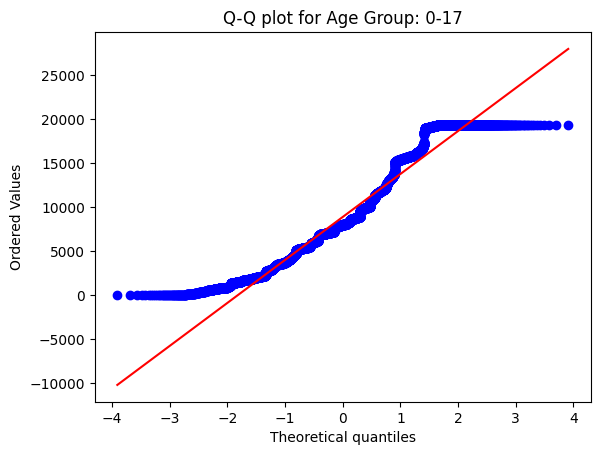

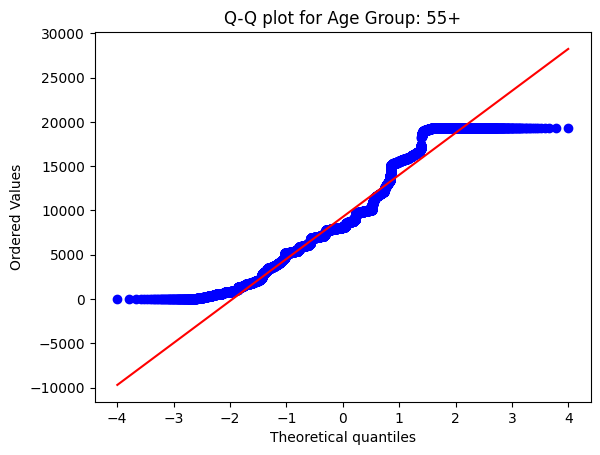

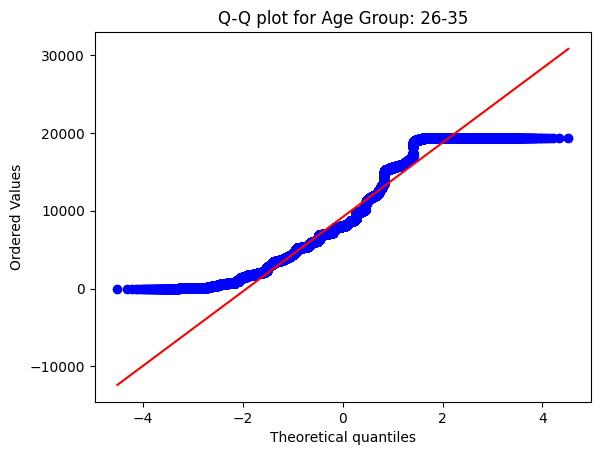

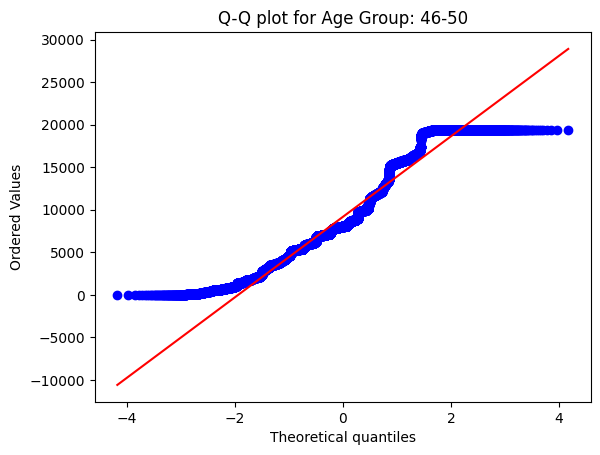

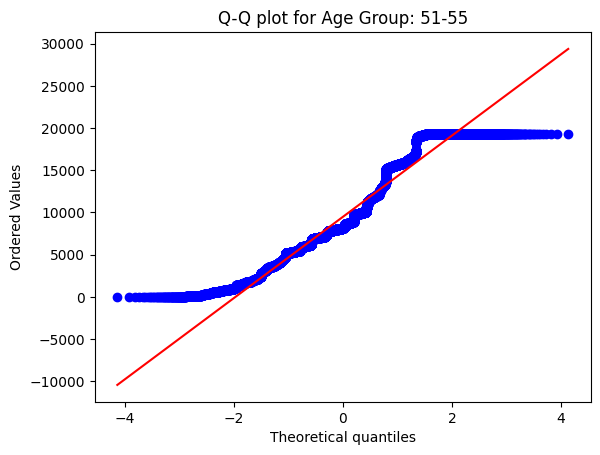

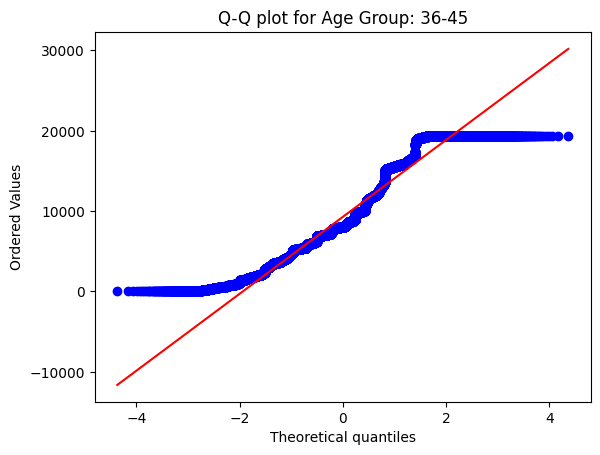

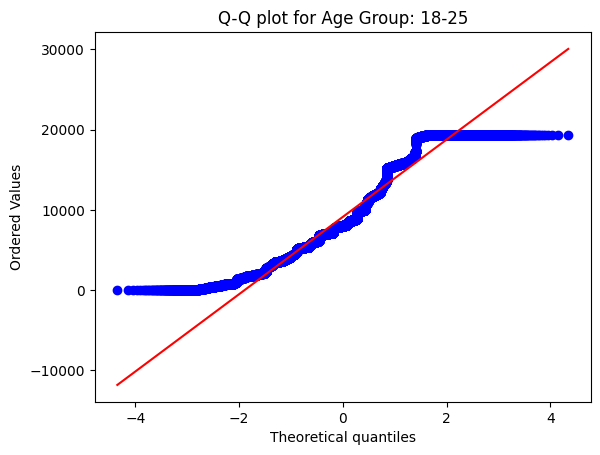

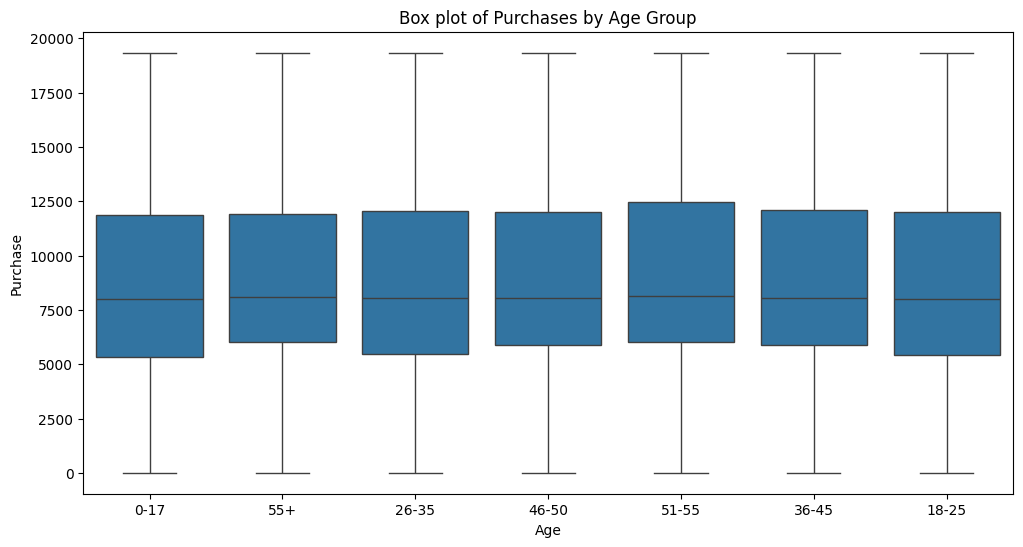

No normality within age groups, because the data points were not along the straight line
<----------------------------------------->
Brown-Forsythe Test: l_stats: 14.018057268077934, p_value: 5.065333108187857e-16
<----------------------------------------->
reject the null hypothesis : There is no equality in variances within age-groups purchases pattern


In [ ]:
import scipy.stats as stats
from scipy.stats import levene

## under qq-plot test,
 # HO: The data is normally distributed
 # H1: The data is not normally distributed
## under Brown-Forsythe Test,
 # HO: The variances are equal across age-groups
 # H1: The variances are different acorss age-groups

alpha = 0.05

age_groups = df["Age"].unique()
age_groups_purchases = [df[df["Age"] == age]["Purchase"] for age in age_groups]


print("<-------Normality assumption result------>")

normality_results = []

for age_group, purchases in zip(age_groups, age_groups_purchases):
    stats.probplot(purchases, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for Age Group: {age_group}')
    plt.show()

# Box plots for variance inspection
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Purchase', data=df)
plt.title('Box plot of Purchases by Age Group')
plt.show()

print("No normality within age groups, because the data points were not along the straight line")

print("<----------------------------------------->")

l_stat, p_value = levene(*age_groups_purchases, center = 'median')

print(f"Brown-Forsythe Test: l_stats: {l_stat}, p_value: {p_value}")

print("<----------------------------------------->")

if p_value < alpha:
 print("reject the null hypothesis : There is no equality in variances within age-groups purchases pattern")
else:
 print("unable to reject null hypothesis : There is equality in variances within age-groups purchases pattern")




As normality and equality of variance assumptions were violated, i used kruskal to calculate the p_value.

In [ ]:
from scipy.stats import kruskal

 # HO: The means of rental bikes usage of different seasons are equal
 # H1: The means of rental bikes usage of differnet seasons are not equal

alpha = 0.05


k_stat, p_value = kruskal(*age_groups_purchases)

print("k_stat :", k_stat, ",", "p_value :", p_value)

print("<----------------------------------------->")

if p_value < alpha:
 print("reject the null hypothesis : There is significant mean difference of purchasing patterns between different age groups")
else:
 print("unable to reject null hypothesis : This is no mean difference of purchasing patterns between different age groups")

k_stat : 311.5253430385636 , p_value : 2.7707941449758802e-64
<----------------------------------------->
reject the null hypothesis : There is significant mean difference of purchasing patterns between different age groups


In [ ]:
from scipy.stats import chi2_contingency

 # H0: There is independency between age and marital_status
 # H1: There is dependency between age and marital_status

 # Construct a contingency table

contingency_table = pd.crosstab(df.Age, df.Marital_Status)
print(contingency_table)

print("<--------------------------------->")
print("<--------------------------------->")

 # Perform chi-square test of independence

chi2, p_value, dof, expected_values = chi2_contingency(contingency_table)


# Print results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected_values)
print("<--------------------------------->")


# Interpret the results
alpha = 0.05

if p_value < alpha:
 print("Reject the null hypothesis: There is a significant association between Age and Marital status (dependency exists).")
else:
 print("Fail to reject the null hypothesis: There is no significant association between Age and marital Status (independency exists).")

Marital_Status       0      1
Age                          
0-17             15102      0
18-25            78544  21116
26-35           133296  86291
36-45            66377  43636
46-50            12690  33011
51-55            10839  27662
55+               7883  13621
<--------------------------------->
<--------------------------------->
Chi-square statistic: 65038.31034963805
p-value: 0.0
Degrees of freedom: 6
Expected frequencies table:
[[  8915.42056982   6186.57943018]
 [ 58833.98318026  40826.01681974]
 [129632.52924548  89954.47075452]
 [ 64945.84579179  45067.15420821]
 [ 26979.44877906  18721.55122094]
 [ 22728.95029524  15772.04970476]
 [ 12694.82213835   8809.17786165]]
<--------------------------------->
Reject the null hypothesis: There is a significant association between Age and Marital status (dependency exists).


In [ ]:
# H0: There is independency between age and Occupation
# H1: There is dependency between age and Occupation

 # Construct a contingency table

contingency_table = pd.crosstab(df.Occupation, df.Age )
print(contingency_table)

print("<--------------------------------->")
print("<--------------------------------->")

 # Perform chi-square test of independence

chi2, p_value, dof, expected_values = chi2_contingency(contingency_table)


# Print results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected_values)
print("<--------------------------------->")


# Interpret the results
alpha = 0.05

if p_value < alpha:
 print("Reject the null hypothesis: There is a significant association between Age and Occupation (dependency exists).")
else:
 print("Fail to reject the null hypothesis: There is no significant association between Age and Occupation (independency exists).")

Age          0-17  18-25  26-35  36-45  46-50  51-55   55+
Occupation                                                
0            2134   9095  34204  13393   4488   4602  1722
1             387   3820  19080   9501   7089   4410  3139
2             144   4364  12617   5183   2124   1344   812
3               0   1860   8159   4126   1599   1094   812
4             113  48241  21829   1747    129    249     0
5               0   1450   6082   3066   1187    377    15
6               0   1144   7216   4822   2561   3952   660
7             139   2078  24060  18762   6664   5355  2075
8              29     14    378     98    549    317   161
9               0    559   1489   3096    528    398   221
10          10951   1649     26    170      0      0   134
11             18    717   5009   2732   1584   1383   143
12            237   4585  15279   6848   2491   1417   322
13             15      0      0    427    631   1785  4870
14             93   4388  13446   5590   1445   1012  13

# Building Linear regression model to establish relationships

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols, glm

<Axes: xlabel='boxcox_Purchase', ylabel='Count'>

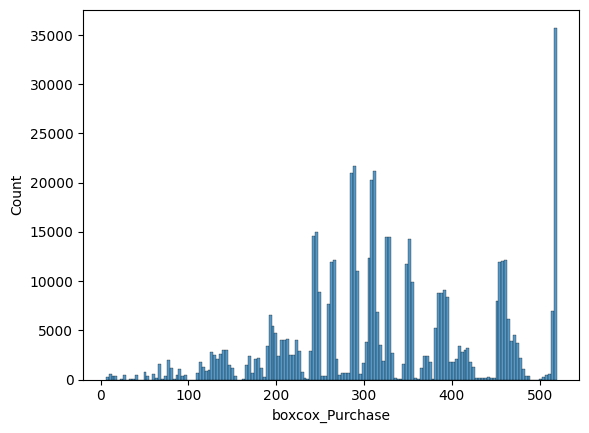

In [ ]:
from scipy.stats import boxcox
df['boxcox_Purchase'], _ = boxcox(df['Purchase'] + 1)

sns.histplot(x = 'boxcox_Purchase', data = df)

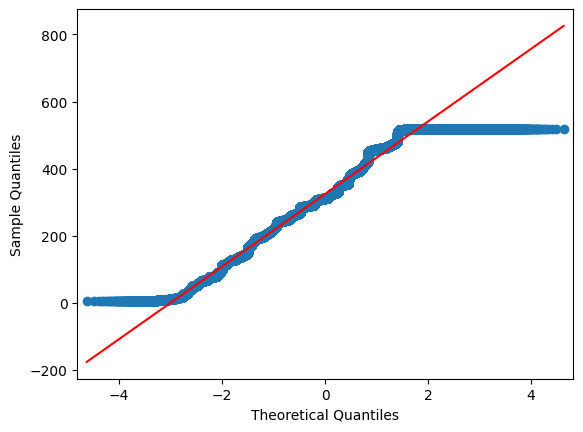

In [ ]:
fig = sm.qqplot(df['boxcox_Purchase'], line = 's')
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Marital_Status', 'Age', 'Gender'], drop_first=True)
X = df_encoded.drop(columns=['Purchase', 'User_ID', 'Product_ID', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Product_Category', 'boxcox_Purchase'])
y = df['boxcox_Purchase']

In [ ]:
X

,Marital_Status_1,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_M
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...
550063,True,False,False,False,False,True,False,True
550064,False,False,True,False,False,False,False,False
550065,True,False,True,False,False,False,False,False
550066,False,False,False,False,False,False,True,False


In [ ]:
X.corr(method = 'spearman')

,Marital_Status_1,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_M
Marital_Status_1,1.000000,-0.189174,-0.027654,-0.013227,0.191389,0.172278,0.091778,-0.011603
Age_18-25,-0.189174,1.000000,-0.383431,-0.235194,-0.141595,-0.129045,-0.094879,-0.000246
Age_26-35,-0.027654,-0.383431,1.000000,-0.407567,-0.245369,-0.223622,-0.164415,0.029811
Age_36-45,-0.013227,-0.235194,-0.407567,1.000000,-0.150507,-0.137168,-0.100851,-0.000088
Age_46-50,0.191389,-0.141595,-0.245369,-0.150507,1.000000,-0.082580,-0.060716,-0.029262
Age_51-55,0.172278,-0.129045,-0.223622,-0.137168,-0.082580,1.000000,-0.055334,-0.006416
Age_55+,0.091778,-0.094879,-0.164415,-0.100851,-0.060716,-0.055334,1.000000,0.004921
Gender_M,-0.011603,-0.000246,0.029811,-0.000088,-0.029262,-0.006416,0.004921,1.000000


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
Marital_Status_1,0.000009
Age_18-25,0.000016
Age_26-35,0.000011
Age_36-45,0.000016
Age_46-50,0.000031
Age_51-55,0.000036
Age_55+,0.000055
Gender_M,0.000009


In [ ]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ols = LinearRegression()
ols.fit(X_train, y_train)
y_pred_ols = ols.predict(X_test)
print("(OLS Regression)")
print("Coefficients:", ols.coef_)
print("Intercept:", ols.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ols))
print("R2 Score:", r2_score(y_test, y_pred_ols))
print()

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("(Ridge Regression)")
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))
print()

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("(Lasso Regression)")
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))

(OLS Regression)
Coefficients: [-0.66151696  1.88490466  3.47854389  3.43751237  1.87956537  3.39884185
  1.65554822  6.17369049]
Intercept: 324.74590811718497
Mean Squared Error: 11590.76733722138
R2 Score: 0.003602386455811124

(Ridge Regression)
Coefficients: [-0.66150191  1.88472475  3.47831229  3.43732058  1.87943041  3.39871397
  1.65545329  6.1736792 ]
Intercept: 324.74590811718497
Mean Squared Error: 11590.767382107771
R2 Score: 0.0036023825971628343

(Lasso Regression)
Coefficients: [-0.         -0.          0.          0.         -0.          0.54219623
  0.          5.21889183]
Intercept: 324.74590811718497
Mean Squared Error: 11595.64956499867
R2 Score: 0.0031826868824749166


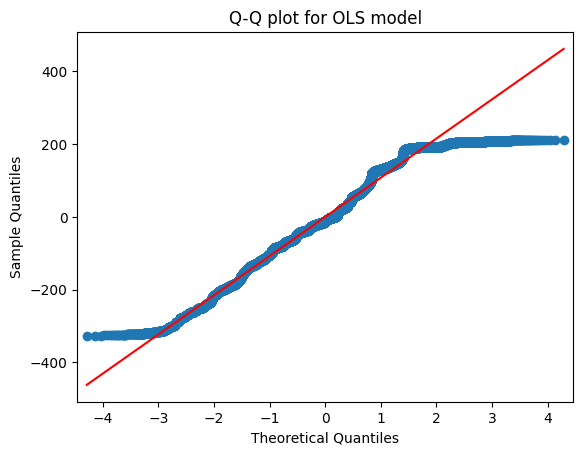

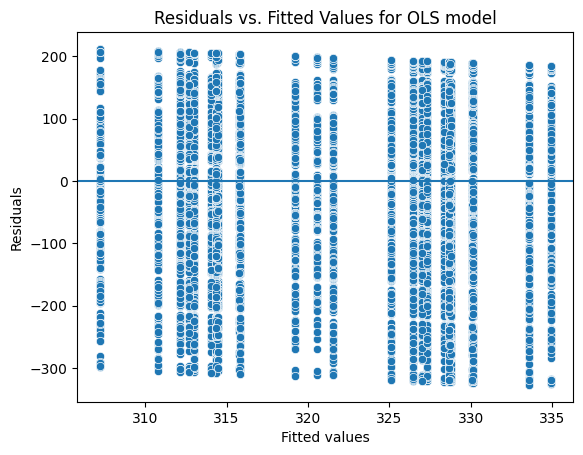

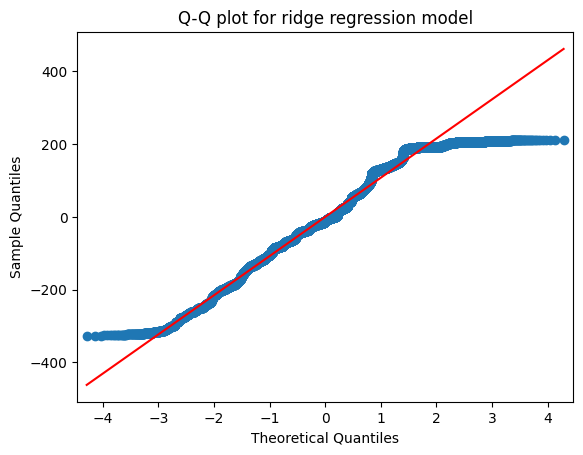

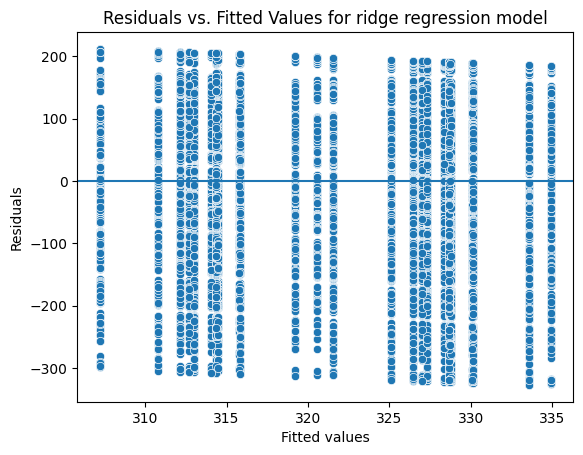

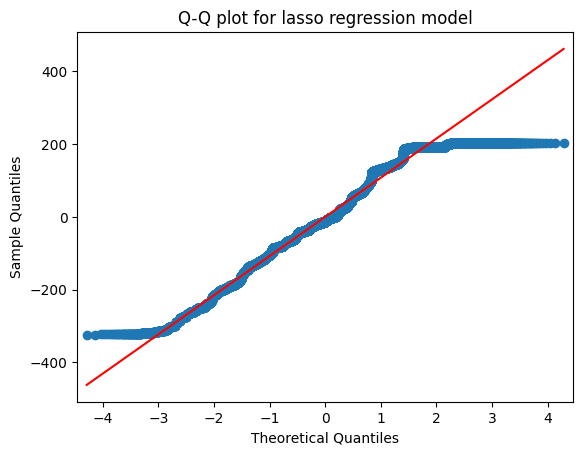

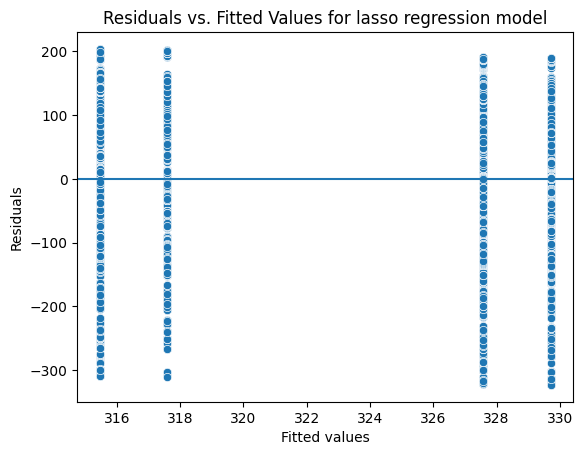

In [ ]:
def evaluate_model(y_test, y_pred, model_name):
  residuals = y_test - y_pred

  sm.qqplot(residuals, line = 's')
  plt.title(f"Q-Q plot for {model_name}")
  plt.show()

  sns.scatterplot(x = y_pred, y = residuals)
  plt.axhline(0)
  plt.xlabel('Fitted values')
  plt.ylabel('Residuals')
  plt.title(f"Residuals vs. Fitted Values for {model_name}")
  plt.show()

evaluate_model(y_test, y_pred_ols, "OLS model")
evaluate_model(y_test, y_pred_ridge, "ridge regression model")
evaluate_model(y_test, y_pred_lasso, "lasso regression model")

In [4]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/walmart-Dataset@Dhanureddy.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/walmart-Dataset@Dhanureddy.ipynb to pdf
[NbConvertApp] Support files will be in walmart-Dataset@Dhanureddy_files/
[NbConvertApp] Making directory ./walmart-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./walmart-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./walmart-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./walmart-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./walmart-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./walmart-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./walmart-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./walmart-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./walmart-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./walmart-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./walmart-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./walmart-Dataset@Dhanureddy_files
[NbConve